Knight's Walk

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1 - Initialize the board

https://www.youtube.com/watch?v=RGQe8waGJ4w

We will store the chess board in a 2d- numpy array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```python
board = initialize_board(3)
```
the correct output is
```python
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Python uses 0-based indexing, the center square of the array `board` is given by element `board[n,n]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [7]:
def initialize_board(n):
    
    # Intializing the board and the center value being 1

    dim_board = 2*n+1                               #board's dimension
    board = np.zeros((dim_board,dim_board),int)     #initialize all zero matrix
    i = 1
    board[n,n] = i                                  #center value 1
    i += 1                                             #incremental index
    
    
    for circle in range (1,n+1):
        
        # Moving the index up
        for up in range (n+circle,n-circle,-1):

            board[up-1,n+circle] = i
            i += 1
            
            
        # Moving the index left
        for left in range (n+circle,n-circle,-1):
           
            board[n-circle][left-1] = i
            i += 1
         
            
        #Moving the index down
        for down in range (n-circle,n+circle):
          
            board[down+1][n-circle] = i
            i += 1
          
            
        # Moving the index right
        for right in range (n-circle,n+circle):
           
            board[n+circle][right +1] = i
            i += 1
          
        
    return board




In [8]:
def initialize_board(n):
    
    # Second Method

    dim_board = 2*n+1                               #board's dimension
    board = np.zeros((dim_board,dim_board),int)     #initialize all zero matrix
    i = 1
    board[n,n] = i                                  #center value 1
    i += 1                                             #incremental index
    x = n; y = n                                        #cartesian index
    
    for circle in range (n):                            #inside the integer numbers range
        x+=1
        y+=1
        steps = 2*(circle+1)                            #moving dimension

        for up in range (steps):

            y-= 1
            board[y,x] = i
            i += 1
            
        for left in range (steps):
           
            x-=1
            board[y][x] = i
            i += 1
         
        for down in range (steps):
            
            y+=1
            board[y][x] = i
            i += 1
          
        for right in range (steps):
           
            x+=1
            board[y][x] = i
            i += 1
          
        
    return board

In [14]:
initialize_board(3)

array([[37, 36, 35, 34, 33, 32, 31],
       [38, 17, 16, 15, 14, 13, 30],
       [39, 18,  5,  4,  3, 12, 29],
       [40, 19,  6,  1,  2, 11, 28],
       [41, 20,  7,  8,  9, 10, 27],
       [42, 21, 22, 23, 24, 25, 26],
       [43, 44, 45, 46, 47, 48, 49]])

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
print("Sequence = ", seq)
print("x-coordinates = ", xs)
print("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [50]:
def simulate_walk(board):
    
    
    sequence = []
    x_coordinates = []
    y_coordinates = []
    x = 0
    y = 0
    board_size = np.size(board,0)
    max_pos = board_size//2
    visited = np.zeros((board_size,board_size),bool)

    #first position
    visited[y+max_pos,x+max_pos] = True
    sequence.append(board[y+max_pos,x+max_pos])
    x_coordinates.append(x)
    y_coordinates.append(y)

    #move
    dead = False
    while not dead:
       # board_min = pow(board_size,2)
        board_min = float('inf')  # Initialize to positive infinity
                                    # initializes board_min to infinity  to ensure that the first valid cell is correctly considered as the minimum.
        dead = True
        positions = ((x + 2, y + 1), (x + 2, y - 1), (x - 2, y - 1), (x - 2, y + 1), (x + 1, y + 2), (x + 1, y - 2), (x - 1, y + 2), (x - 1, y - 2))
        for test_x,test_y in positions:
            if abs(test_x) <= max_pos and abs(test_y) <= max_pos and not visited[test_y+max_pos,test_x+max_pos]:
                board_test = board[test_y+max_pos,test_x+max_pos]
                if board_test < board_min:
                    dead = False
                    board_min = board_test
                    x = test_x
                    y= test_y
        if not dead:
            visited[y+max_pos,x+max_pos] = True
            sequence.append(board_min); x_coordinates.append(x); y_coordinates.append(y)
            

    return ( sequence, x_coordinates, y_coordinates)

In [51]:
simulate_walk(initialize_board(3))

([1,
  10,
  3,
  6,
  9,
  4,
  7,
  2,
  5,
  8,
  11,
  14,
  29,
  32,
  15,
  12,
  27,
  24,
  45,
  20,
  23,
  44,
  41,
  18,
  35,
  38,
  19,
  16,
  33,
  30],
 [0,
  2,
  1,
  -1,
  1,
  0,
  -1,
  1,
  -1,
  0,
  2,
  1,
  3,
  2,
  0,
  2,
  3,
  1,
  -1,
  -2,
  0,
  -2,
  -3,
  -2,
  -1,
  -3,
  -2,
  -1,
  1,
  3],
 [0,
  1,
  -1,
  0,
  1,
  -1,
  1,
  0,
  -1,
  1,
  0,
  -2,
  -1,
  -3,
  -2,
  -1,
  1,
  2,
  3,
  1,
  2,
  3,
  1,
  -1,
  -3,
  -2,
  0,
  -2,
  -3,
  -2])

In [52]:
board = initialize_board(3)
display(board)
sequence,x_coordinates,y_coordinates = simulate_walk(board);
print("Sequence = ", sequence)
print("x-coordinates = ", x_coordinates)
print("y-coordinates = ", y_coordinates)

array([[37, 36, 35, 34, 33, 32, 31],
       [38, 17, 16, 15, 14, 13, 30],
       [39, 18,  5,  4,  3, 12, 29],
       [40, 19,  6,  1,  2, 11, 28],
       [41, 20,  7,  8,  9, 10, 27],
       [42, 21, 22, 23, 24, 25, 26],
       [43, 44, 45, 46, 47, 48, 49]])

Sequence =  [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14, 29, 32, 15, 12, 27, 24, 45, 20, 23, 44, 41, 18, 35, 38, 19, 16, 33, 30]
x-coordinates =  [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1, 3, 2, 0, 2, 3, 1, -1, -2, 0, -2, -3, -2, -1, -3, -2, -1, 1, 3]
y-coordinates =  [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2, -1, -3, -2, -1, 1, 2, 3, 1, 2, 3, 1, -1, -3, -2, 0, -2, -3, -2]


last element =  2084
with coordinates = (10,-23)


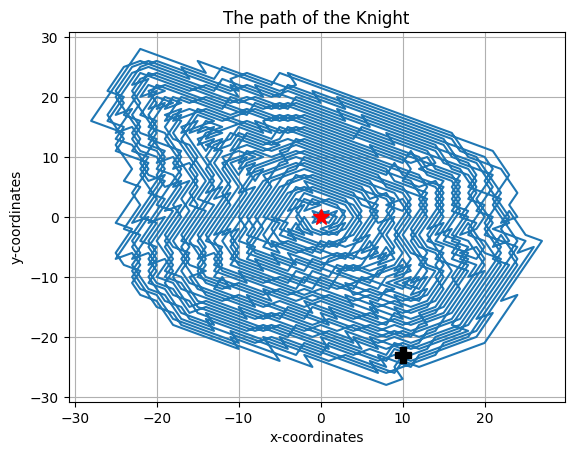

In [54]:
board = initialize_board(100)
sequence,x_coordinates,y_coordinates = simulate_walk(board);



fig,ax=plt.subplots()

print("last element = ", int(sequence[-1]))
print(f"with coordinates = ({ int(x_coordinates[-1])},{int(y_coordinates[-1])})")
plt.plot(x_coordinates,y_coordinates) 
plt.plot(x_coordinates[0],y_coordinates[0], color = "r", marker="*",  markersize=12)
plt.plot(x_coordinates[-1],y_coordinates[-1], color = "black", marker="P",  markersize=12)
plt.title("The path of the Knight")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")

plt.grid(True)

